#Project: Investigate a Dataset:No show Dataset#

Source:Kaggle

**Table of Contents**

1.Introduction

2.Data Wrangling

3.Exploratory Data Analysis

4.Conclusions

**1.Introduction**

This dataset contains data of medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

ScheduledDay: Indicates which day the patient scheduled a medical appointment.

Scholarship: shows if the patient’s family participates in a social welfare program of the government, providing financial aid to poor families.

No-show: Yes' if they did show up and whether the patient showed up or not.'No' if the patient showed up to their appointment

Additional information to each appointment includes gender, age, date of scheduling, date of actual appointment, sms-reminded as well as an indication for one or more diseases, the patient might suffer,including : hypertension, diabetes, alcoholism, handicapped.


Research Questions


1.Does gender affect if the patient will show up for scheduled appointment?

2.Do patients who get a scholarship for their appointments show up to their appointments more?


3.Does getting a reminder SMS affect if the patient will show up for scheduled appointment?

4.What about other factors such as (scholarship, hypertension, diabetes, alcoholic)


**2.Data Wrangling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO

In [2]:
# Creating a function to read a shared csv file via google drive
#
def read_csv(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  csv_raw = requests.get(url).text
  csv = StringIO(csv_raw)
  return csv

# Reading the csv file to a dataframe using the pandas library
#
df = pd.read_csv(read_csv('https://drive.google.com/file/d/12zQbGBDc18YBWwaYegDrr_uvIKv6nJnH/view?usp=sharing'))

# Previewing the first five rows of the dataframe
#
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Previweing some information about the dataframe
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 14 colums and 110.527 rows.

**Data types**
The types of ScheduledDay and Appointmentday need converted to DateTime



In [4]:
# Checking for some statistical summariess of the dataframe
# Transposing the summaries for a better view
#
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# Checking for the shape and size of the dataframe
#
print(f'The shape is {df.shape} and the size is {df.size}')

The shape is (110527, 14) and the size is 1547378


In [6]:
# Checking for duplicates
#
df.duplicated().any()

False

In [7]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in df.columns:
  print(column)
  print(df[column].unique())
  print('\n')

PatientId
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]


AppointmentID
[5642903 5642503 5642549 ... 5630692 5630323 5629448]


Gender
['F' 'M']


ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00

**2.Data Cleaning**

In [8]:
# For consistency and easy reference the columns should be uniform

df.rename(columns= {'Hipertension': 'Hypertension', 'Handcap': 'Handicapped','No-show' : 'no_show', 'SMS_received' : 'sms_received'}, inplace= True)



# Change values of no_show column to be 0: if the patient did showup, and 1: if the patient didn't show up
df.no_show = df['no_show'].apply(lambda x: 0 if x == 'No' else 1)


# Previewing the columns to confirm whether the changes have taken effect
# 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'sms_received', 'no_show'],
      dtype='object')

In [9]:
# Applying this to the whole columns using the .to_datetime() method in panads
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['ScheduledDay'].head())
print('\n')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['AppointmentDay'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [10]:
# Changing column datatypes to their appriopriate datatypes

bool_cols = ['Scholarship', 'Hypertension', 'Alcoholism', 'Diabetes', 'Handicapped', 'sms_received', 'no_show']

  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in bool_cols:
    df[column] = df[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicapped                 bool
sms_received                bool
no_show                     bool
dtype: object

In [11]:
# Value inspection of the columns. Iterating through the concerning columns.
for column in df[bool_cols]:
    print(df[column].value_counts())
    print('\n')

False    99666
True     10861
Name: Scholarship, dtype: int64


False    88726
True     21801
Name: Hypertension, dtype: int64


False    107167
True       3360
Name: Alcoholism, dtype: int64


False    102584
True       7943
Name: Diabetes, dtype: int64


False    108286
True       2241
Name: Handicapped, dtype: int64


False    75045
True     35482
Name: sms_received, dtype: int64


False    88208
True     22319
Name: no_show, dtype: int64




In [12]:
# Remove age below 0 and age above 100 "outliers"
New_age = (df.Age >= 0) & (df.Age < 100)
df = df[New_age]

**Exploratory Data Analysis**

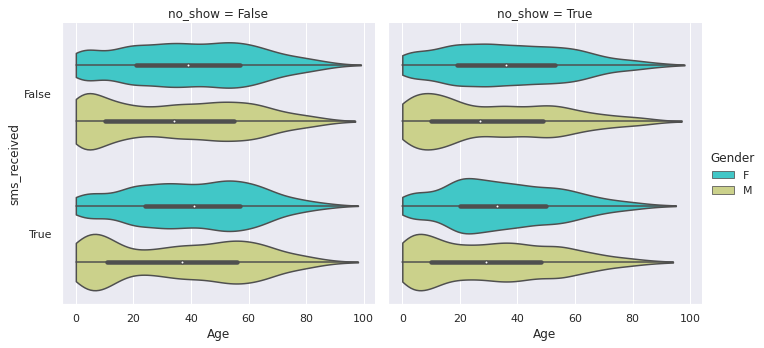

In [13]:
# Plotting violin plots
  #
sns.catplot(x="Age", y="sms_received",hue="Gender",col = 'no_show', data=df,orient="h", height=5, aspect=1, palette="rainbow", kind="violin", dodge=True, cut=0, bw=.2)
plt.show()

From the above chart we can make these observations


The ages of most males with showed up lie between approximately 10 and 50

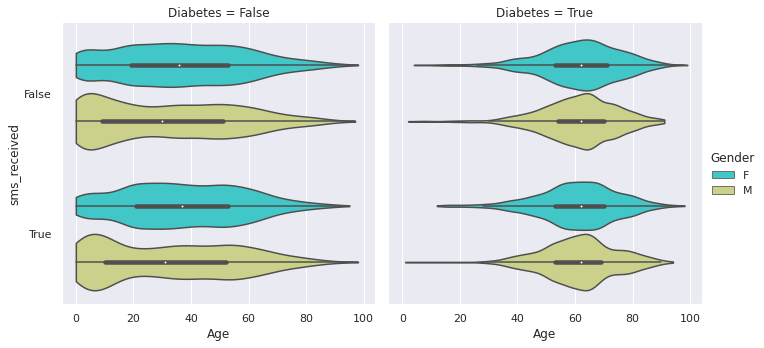

In [14]:
sns.catplot(x="Age", y="sms_received",hue="Gender",col = 'Diabetes', data=df,orient="h", height=5, aspect=1, palette="rainbow", kind="violin", dodge=True, cut=0, bw=.2)
plt.show()

Mostly people aged between 50 and 65 have diabetes.This is well represented and true in both genders

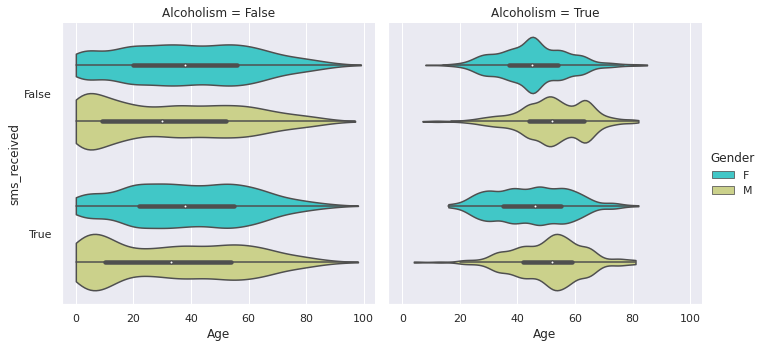

In [15]:
sns.catplot(x="Age", y="sms_received",hue="Gender",col = 'Alcoholism', data=df,orient="h", height=5, aspect=1, palette="rainbow", kind="violin", dodge=True, cut=0, bw=.2)
plt.show()

Most alcoholics are aged 40 and above.

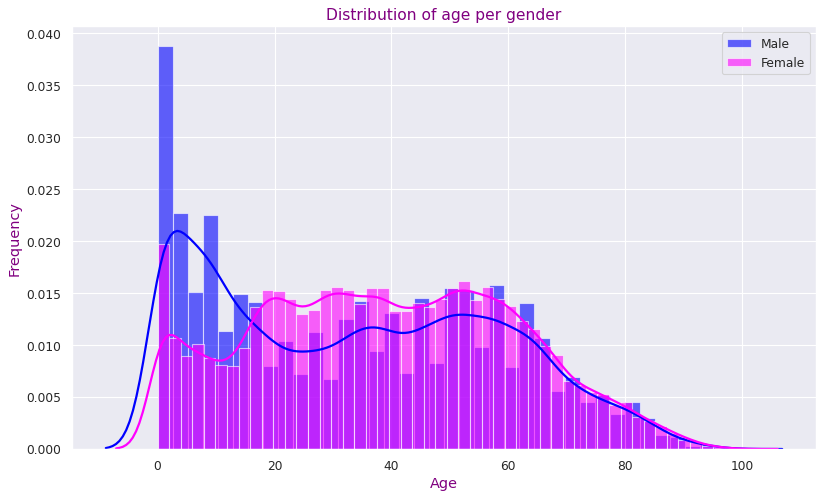

In [16]:
# Plotting histogram to show distribution of age per gender
# 
male = df.loc[df.Gender=='M', 'Age']    # Selecting only male datapoints in the age column
female = df.loc[df.Gender=='F', 'Age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="blue", label="Male", **kwargs)
sns.distplot(female, color="fuchsia", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

From the above histogram, it can be deduced that both the ages of male and female are skewed to the right. This means that the median and mode are less than the mean

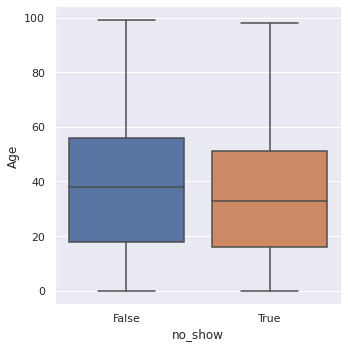

In [17]:
sns.factorplot(x = "no_show", y = "Age", data = df, kind = "box")
plt.show()

In [18]:
def bar_plot(variable) : 
    
    var= df[variable]
    varValue= var.value_counts()
#visualize
    plt.figure(figsize= (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}" .format(variable, varValue))

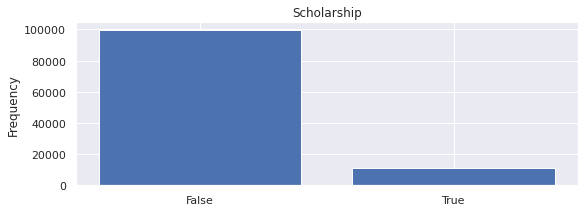

Scholarship: 
 False    99654
True     10861
Name: Scholarship, dtype: int64


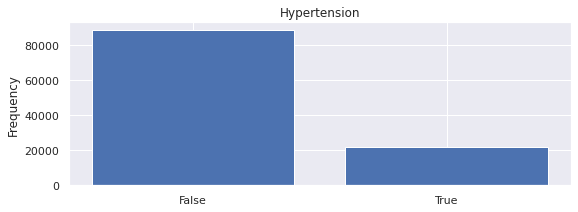

Hypertension: 
 False    88715
True     21800
Name: Hypertension, dtype: int64


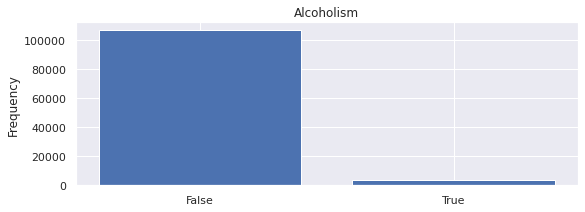

Alcoholism: 
 False    107155
True       3360
Name: Alcoholism, dtype: int64


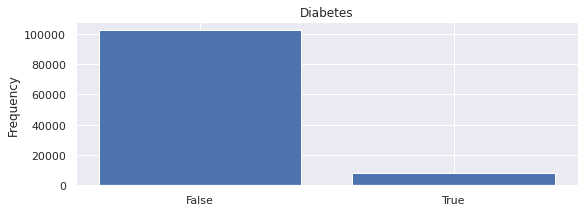

Diabetes: 
 False    102572
True       7943
Name: Diabetes, dtype: int64


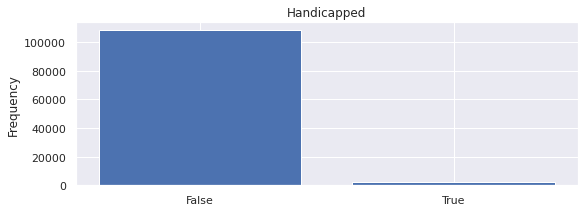

Handicapped: 
 False    108280
True       2235
Name: Handicapped, dtype: int64


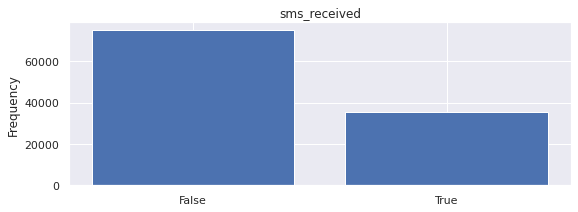

sms_received: 
 False    75035
True     35480
Name: sms_received, dtype: int64


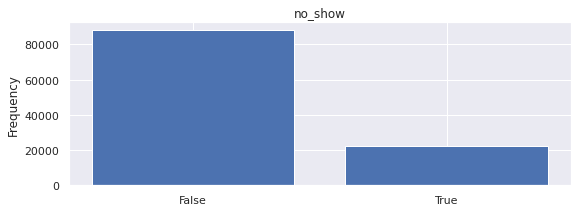

no_show: 
 False    88199
True     22316
Name: no_show, dtype: int64


In [19]:

for c in bool_cols : 
    bar_plot(c)

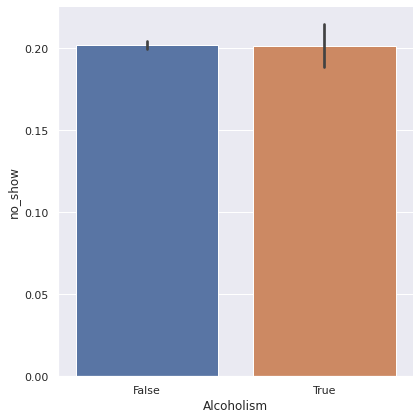

In [20]:
g= sns.factorplot(x= "Alcoholism", y= "no_show", data= df, kind= "bar", size= 6)
plt.show()

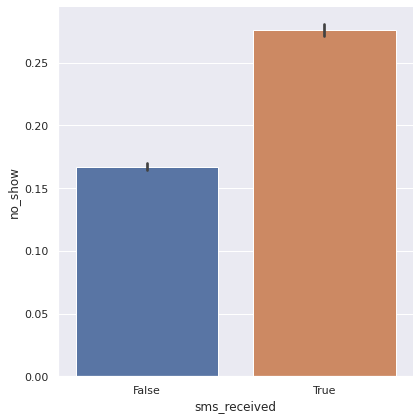

In [36]:
g= sns.factorplot(x= "sms_received", y= "no_show", data= df, kind= "bar", size= 6)
plt.show()

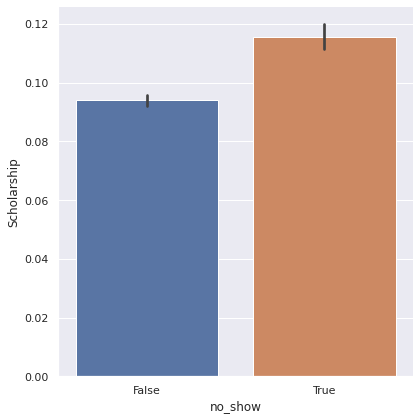

In [33]:
g= sns.factorplot(x= "no_show", y= "Scholarship", data= df, kind= "bar", size= 6)
plt.show()

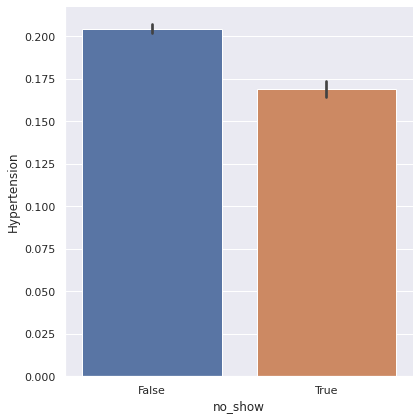

In [32]:
g= sns.factorplot(x= "no_show", y="Hypertension", data= df, kind= "bar", size= 6)
plt.show()

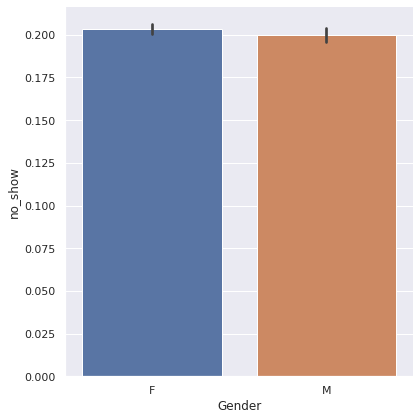

In [24]:
g= sns.factorplot(x= "Gender", y="no_show", data= df, kind= "bar", size= 6)
plt.show()

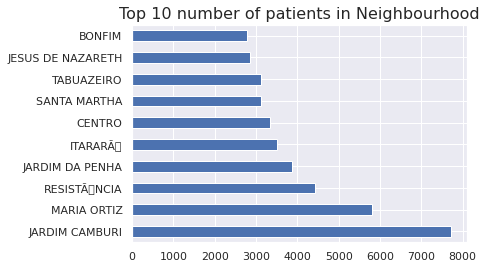

In [25]:
# Visualise Top 10 Neighbourhood distribution
(df['Neighbourhood'].value_counts(normalize=False)).head(10).plot(kind='barh')
plt.title('Top 10 number of patients in Neighbourhood', fontsize=16);

Jardim camburi has the  highest count of patients

In [26]:
# Create column with differ between columns "AppointmentDay" and "ScheduledDay"
df['wait_date'] = ((df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days)

In [27]:
# Check for lines with wait_time < 0
df[(df['wait_date'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,sms_received,no_show,wait_date
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÃNCIA,False,False,False,False,True,False,True,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÃNIO,False,False,False,False,True,False,True,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÃÃO,False,False,False,False,False,False,True,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÃNIO,False,False,False,False,False,False,True,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,False,False,False,False,False,False,True,-1


In [28]:
# Analyze the "sms_received" and "no_show"
df_sms = df[['sms_received', 'no_show']]

In [29]:
# Function to plot bar chart
def bar_chart(list_locations, list_values, list_labels, title, xlabel, xlabel_fontsize=None, title_fontsize=None):
    """
    Input values locations, list of values, list of labels, title, xlabels and ylabels return bar plot.
    Opcional Input: fontsize from xlabel, ylabel and title.
    """
    plt.bar(list_locations, list_values, tick_label=list_labels)
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel(xlabel, fontsize=xlabel_fontsize);

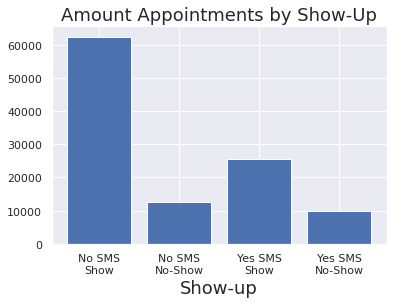

In [30]:
# Create a bar chart with proper labels
positions = [1, 2, 3, 4]
values = df_sms.groupby('sms_received')['no_show'].value_counts()
labels = ['No SMS\nShow', 'No SMS\nNo-Show', 'Yes SMS\nShow', 'Yes SMS\nNo-Show']
bar_chart(positions, values, labels, 'Amount Appointments by Show-Up', 'Show-up', xlabel_fontsize=18, title_fontsize=18)

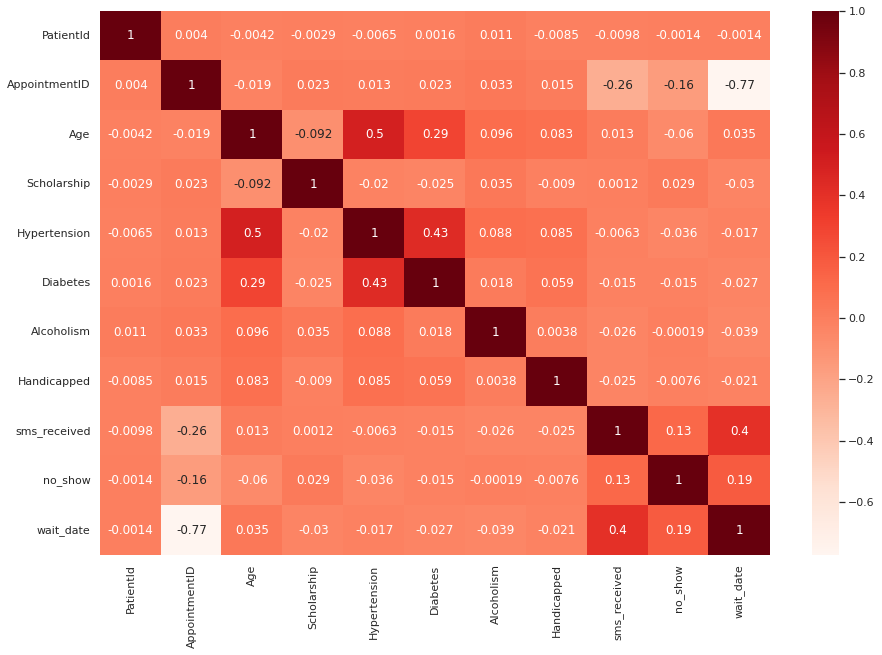

In [31]:
corr = df.corr()
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap="Reds", annot = True)
plt.show()

**Conclusions**

1.Does gender affect if the patient will show up for scheduled appointment?
 Gender and Alcoholism has no relation with whether the patient will show up or not

2.Do patients who get a scholarship for their appointments show up to their appointments more?
Yes there is a higher number of patients who show up to appointments after being sponspored compared to those who do not.

3.Does receiving an sms affect if the patient will show up for scheduled appointment? A higher percentage of people who received SMS and did not show up compared to people who did not receive SMS

5.what about other factors such as (scholarship, hypertension, diabetes, alcoholic
There is not much of a difference for the diseases (hypertension, diabetes, alcoholism or handicap) the patient suffers.




**Limitations**

1.No strong correlation between most of the independent variables and the no_show rate. This because most of them are categorical.

2.The dataset is highly imbalanced, it has more negative cases than positive cases

3.There is not alot of information about the type of handicap.

4.The data are for a one year period for the year 2016. A time series might yield better results.

5.Lastly, and most surprisingly is that despite an SMS-reminding the patients of their upcoming appointment We have a higher percentage of people who received SMS and did not-show up compared to people who did not receive SMS.
